In [63]:
!pip install mysql-connector-python

In [23]:
#importing matplot
import matplotlib.pyplot as plt 

#importing numpy
import numpy as np 

# Set plot space as inline for inline plots display
%matplotlib inline

In [64]:
# importing pandas into jupyter notebook
import pandas as pd
#importing SQL connector
import mysql.connector

con = mysql.connector.connect(user='hbs-student', password='super-secure-password?',
                              host='hbs-ds-060120.c1doesqrid0e.us-east-1.rds.amazonaws.com',
                              database='movies')

In [65]:
#importing Box office database
# box_m = pd.read_sql_query('select * from bom_movie_gross', con)
df = pd.read_sql_query("""
                         SELECT  title, studio, bom_movie_gross.domestic_gross, 
                                 foreign_gross, year, tconst, runtime_minutes, genres, 
                                 averagerating, numvotes, directors, writers, production_budget
                         FROM movies.bom_movie_gross
                         JOIN imdb_title_basics
                         ON title = primary_title
                         JOIN imdb_title_ratings
                         USING (tconst)
                         JOIN imdb_title_crew
                         USING (tconst)
                         JOIN tn_movie_budgets
                         ON title = movie;
                         """, con)


In [66]:
df.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,runtime_minutes,genres,averagerating,numvotes,directors,writers,production_budget
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,103.0,"Adventure,Animation,Comedy",8.3,682218,nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335","$200,000,000"
1,Inception,WB,292600000.0,535700000.0,2010,tt1375666,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,nm0634240,nm0634240,"$160,000,000"
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,tt0892791,93.0,"Adventure,Animation,Comedy",6.3,167532,nm0593610,"nm0825308,nm0458441,nm0501359,nm0011470,nm0254...","$165,000,000"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,tt1325004,124.0,"Adventure,Drama,Fantasy",5.0,211733,nm1720541,"nm0742279,nm2769412","$68,000,000"
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,tt1228705,124.0,"Action,Adventure,Sci-Fi",7.0,657690,nm0269463,"nm0857620,nm0498278,nm1411347,nm1293367,nm0456158","$170,000,000"


In [51]:
df = box_m.groupby('year').sum()
dff = df.reset_index()
dff

,year,domestic_gross,foreign_gross
0,2010,1.015693e+10,1.437426e+10
1,2011,1.006416e+10,1.567099e+10
2,2012,1.087661e+10,1.703789e+10
3,2013,1.079233e+10,1.661239e+10
4,2014,1.033774e+10,1.697197e+10
5,2015,1.105141e+10,1.520395e+10
6,2016,1.125365e+10,1.911904e+10
7,2017,1.093327e+10,2.005093e+10
8,2018,1.109121e+10,1.747449e+10


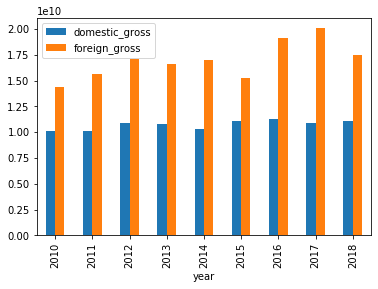

In [55]:
dff.plot(x='year', y = ['domestic_gross', 'foreign_gross'], kind = 'bar')
plt.show()

In [57]:
bo = box_m.groupby(['year', 'studio']).sum()
bb = bo.reset_index()
bb.head(11)

,year,studio,domestic_gross,foreign_gross
0,2010,,9.690000e+04,3.300000e+06
1,2010,3D,6.100000e+06,9.900000e+06
2,2010,ATO,1.000000e+06,4.070000e+04
3,2010,Abr.,2.574000e+05,9.010000e+05
4,2010,Anch.,1.171510e+07,7.999000e+06
5,2010,App.,3.600000e+06,1.100000e+06
6,2010,Arth.,1.880000e+05,8.870000e+04
7,2010,BV,1.519129e+09,2.652041e+09
8,2010,CBS,7.280000e+07,5.550000e+07
9,2010,CGld,2.402000e+05,1.310000e+05
